## This is an Task 2 Solution Worked out Notebook
        -- Solution by Hitesh Padal

### First of all the required libraries are imported

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

### Importing Data

In [2]:
url = "./student_scores.csv"
student_data = pd.read_csv(url)
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
plt.style.use('seaborn')

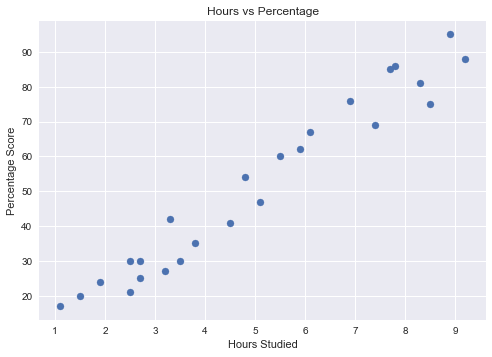

In [4]:
plt.scatter(student_data['Hours'], student_data['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**From the above plot of the data we can clearly see that there is a Positive Linear Correlation between 'No.of Hours Studied' and 'Percentage of Score'**

### Preparing the data for Regression Analysis

The next Step is to divide data into 'attributes' (inputs) and 'labels' (outputs) 

[Mathematically termed as independent variables and dependent variables]

In [5]:
x = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

Now that attributes and labels separated, the next step is to split the data into training and test sets. This is done by using Scikit-Learn's built-in train_test_split() method():

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [7]:
x_train[1]

array([1.9])

### Training the Algorithm

After splitting the data into training and testing sets, the LinearRegression algorithm will be used to train on the training data

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X = x_train, y = y_train)   # Here the data to be fit needs to be passed by
                                          # assigning to the corresponding predefined parameters
                                          # this might be because of the feature change in the updated version
                                          # Refer to the documentation of LinearRegression for more info

print('Training complete.')

Training complete.


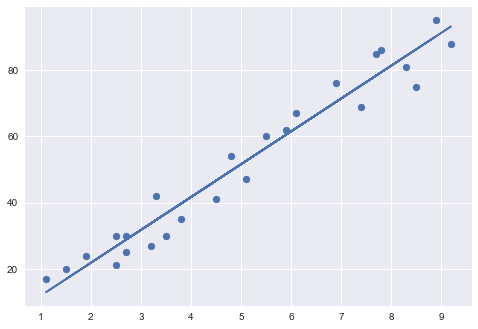

In [9]:
# Plotting the regression line
y_valueToPlot = regressor.coef_ * x + regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, y_valueToPlot);
plt.show()

### Making Predictions
Now the model is trained on LinearRegression and is stored in 'regressor' variable. It's time to make predictions.

In [10]:
print('x_test:\n', x_test,'\n')  # Test data - in hours
y_pred = regressor.predict(x_test)  # Predicting the scores for test data
print('y_pred:\n', y_pred)

x_test:
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]] 

y_pred:
 [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': (y_test - y_pred)})
df

,Actual,Predicted,Difference
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


In [19]:
# Predicting the Score of the Student if the student had studied for 9.5 Hours
hours = 9.25
pred_score = regressor.predict(np.array(hours).reshape(1,-1))
print('No. of Hours studied by Student =', hours)
print('Predicted Score =', pred_score)

No. of Hours studied by Student = 9.25
Predicted Score = [93.69173249]


### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [13]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  4.183859899002975
